<a href="https://colab.research.google.com/github/manisha-1112/Netflix-EDA-Analysis/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **EDA Analysis on NETFLIX**



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name** - Manisha Kaushal


# **Project Summary -**



This project looks at Netflix’s catalog from 2019 to figure out what kind of shows and movies are on the platform, which countries have access to what content, and how that content is spread out. It also groups similar shows together based on their descriptions and genres to help improve recommendations and business decisions.

Over time, Netflix has shifted gears — it’s been producing and adding way more TV shows compared to movies. We wanted to see how this trend has grown, what types of content are most common, and how things differ from country to country. The data we used includes around 7,800 Netflix titles, with details like type (movie/show), genre, country, release year, duration, and descriptions.

We started by cleaning up the data and checking for missing information. We found that a lot of titles don’t list a director, cast, or country. This missing info matters because it can affect things like content discovery and recommendations.

Then, we explored the data using different types of charts. We found that:

* “TV-MA” is the most common rating (meaning mature audiences).
* The U.S. makes the most content.
* Most content was added after 2015 — showing Netflix’s big recent push to grow its library.

When we looked at things like genre over time or how long movies/shows are by rating, we got a better idea of how content trends are changing. We also saw that some regions — like Africa, Eastern Europe, and parts of Asia — don’t have nearly as much content available compared to places like the U.S. That shows there’s a chance for Netflix to grow in these areas by adding more local content.

One of the cooler parts of this project was using text analysis (NLP) to group similar shows and movies based on their descriptions and genres. We used TF-IDF to turn text into numbers and then KMeans to group titles. This helps with better recommendations and smarter content tagging.

### Main Takeaways:

* We now understand which types of content are most common on Netflix.
* We found which countries are overloaded and which are underserved.
* Trends show a big shift toward more TV shows and more content in recent years.
* Grouping similar content can help Netflix give users better recommendations.
* All this data can help Netflix decide what to make, where to expand, and how to personalize the platform better.




Provide your GitHub Link here.

# **Problem Statement**







**Write Problem Statement Here.**

The goal of this project is to explore the Netflix dataset in depth to uncover meaningful insights about how content is distributed across different genres, what types of ratings are most common, which countries are producing the most content, and when most of the content has been released. By analyzing these patterns and trends, the aim is to help guide smarter decisions in content creation, regional marketing strategies, and future planning for what kinds of shows and movies to promote or invest in.

#### **Define Your Business Objective?**




Business Objective

* **Descriptive Analysis** – Identify common patterns in genre, rating, and release year.
* **Regional Insights** – Analyze how content varies across different countries.
* **Trend Analysis** – Study the shift from movies to TV shows over time.
* **Audience Insights** – Understand popular content types to guide acquisition.
* **Content Clustering** – Group similar titles using text data to improve recommendations.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For text clustering later
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(df.shape)

(7787, 12)


### Dataset Information

In [5]:
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
None


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(duplicate_count)

0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print(missing_values)

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


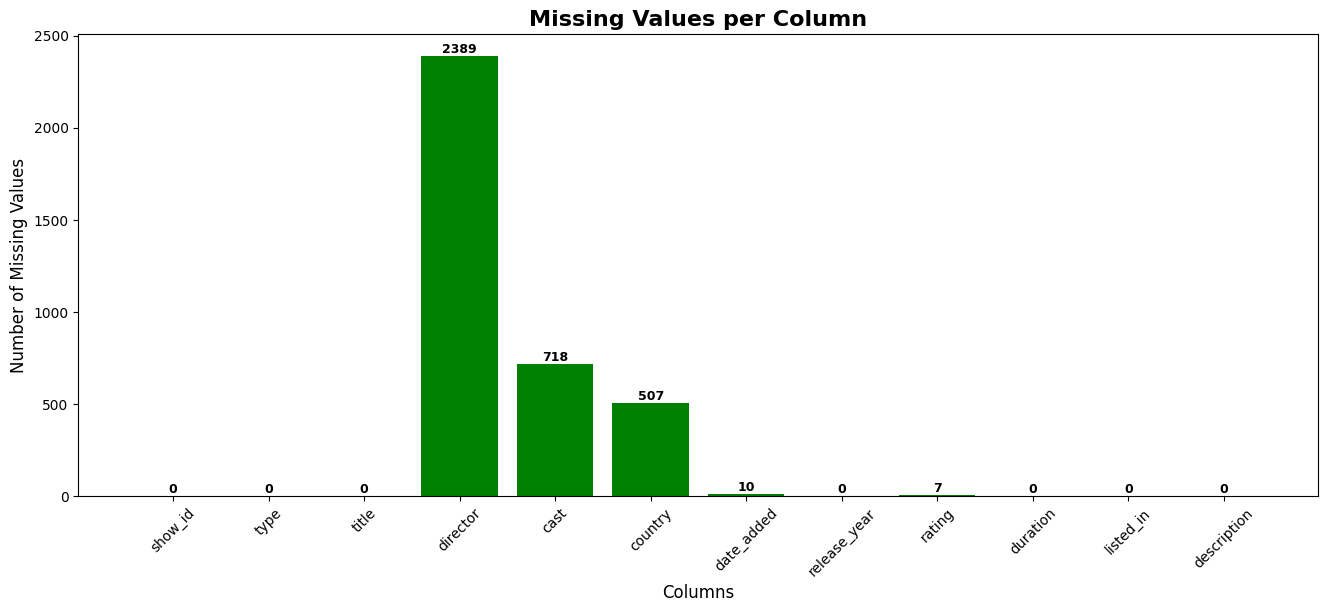

In [8]:
# Visualizing the missing values
# Calculating the number of missing values per column
missing_values = df.isnull().sum()

# Plotting the missing values
fig, ax = plt.subplots(figsize=(16, 6))
bars = ax.bar(missing_values.index, missing_values.values, color='green')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}',
            ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

# Adding labels and title
plt.title('Missing Values per Column', fontsize=16, fontweight='bold')
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.xticks(rotation=45)

# Display the plot
plt.show()

### What did you know about your dataset?

There are 7787 rows and 12 columns in the given dataset. Out of which 5 Columns have missing Values. Column director have most missing values of 2389, then cast with 718 missing values, then country with 507 missing values, then date_added with 10 missing values and ratings with least missing values of 7.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

### Variables Description


  

1. **show_id** – A unique identifier assigned to each title (movie or TV show).  
2. **type** – Indicates whether the content is a **Movie** or a **TV Show**.  
3. **title** – The name of the movie or TV show.  
4. **director** – The names of the directors. Multiple directors may be listed, separated by commas.  
5. **cast** – The main actors or actresses featured in the title. Multiple names may be listed, separated by commas.  
6. **country** – The country (or countries) where the title was produced. Multiple countries may be listed, separated by commas.  
7. **date_added** – The date when the title was added to Netflix (in Month Day, Year format).  
8. **release_year** – The year when the movie or TV show was originally released.  
9. **rating** – The content rating (e.g., *PG-13, TV-MA, R*) indicating the intended audience.  
10. **duration** –  Length of the movie (in minutes) or number of seasons for a TV show.
11. **listed_in** – The genre(s) or category. Multiple genres may be listed, separated by commas.  
12. **description** – A brief summary of the plot or theme of the title.  

### Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable.
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

show_id: 7787 unique values
type: 2 unique values
title: 7787 unique values
director: 4049 unique values
cast: 6831 unique values
country: 681 unique values
date_added: 1565 unique values
release_year: 73 unique values
rating: 14 unique values
duration: 216 unique values
listed_in: 492 unique values
description: 7769 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Import necessary libraries
from itertools import chain
from collections import Counter

# 1. Create a copy of the dataset (assumes df is already loaded)
df = df.copy()

# 2. Fill missing values using assignment instead of inplace (to avoid FutureWarning)
df['director'] = df['director'].fillna("Not Available")
df['cast'] = df['cast'].fillna("Not Available")
df['country'] = df['country'].fillna("Not Available")
df['date_added'] = df['date_added'].fillna("Not Available")
df['rating'] = df['rating'].fillna("Not Rated")

# 3. Convert 'date_added' column to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# 4. Extract year and month from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

# 5. Convert year into integer type
df['year_added'] = df['year_added'].astype('Int64')  # Use Int64 to allow NaNs

# 6. Drop irrelevant columns safely
if 'show_id' in df.columns:
    df.drop(columns=['show_id'], inplace=True)

# 7. Creating genre list
# Strip whitespace and ensure consistency
df['listed_in'] = df['listed_in'].str.strip()

# Create a list of genres in a new column
df['genre_list'] = df['listed_in'].str.split(',\s*')  # Splits by comma and strips spaces

# 8. Extract and count all unique genres
all_genres = list(chain.from_iterable(df['genre_list']))
unique_genres = set(all_genres)
print("Unique genres:")
print(unique_genres)

# 9. Value count for each genre
genre_counts = pd.Series(Counter(all_genres)).sort_values(ascending=False)
print("\nGenre counts:")
print(genre_counts)


Unique genres:
{'Spanish-Language TV Shows', 'Independent Movies', 'TV Dramas', 'Classic Movies', 'Science & Nature TV', 'Faith & Spirituality', 'Teen TV Shows', 'International TV Shows', 'Music & Musicals', 'Romantic TV Shows', 'Docuseries', 'TV Horror', 'Sports Movies', 'Thrillers', 'Comedies', 'Children & Family Movies', 'Sci-Fi & Fantasy', 'TV Thrillers', 'Crime TV Shows', 'Movies', 'Stand-Up Comedy', 'Korean TV Shows', 'Stand-Up Comedy & Talk Shows', 'Horror Movies', 'International Movies', 'TV Action & Adventure', 'Classic & Cult TV', 'Documentaries', 'TV Comedies', 'TV Mysteries', "Kids' TV", 'Anime Features', 'Anime Series', 'Cult Movies', 'Dramas', 'British TV Shows', 'Action & Adventure', 'TV Shows', 'LGBTQ Movies', 'TV Sci-Fi & Fantasy', 'Romantic Movies', 'Reality TV'}

Genre counts:
International Movies            2437
Dramas                          2106
Comedies                        1471
International TV Shows          1199
Documentaries                    786
Action &

### What all manipulations have you done and insights you found?





### **Manipulations Done on the Data**

1. **Missing Value Handling**:

   * Replaced missing values in key columns (director, cast, country, date_added, rating) with meaningful placeholders like "Not Available" or "Not Rated".

2. **Date Parsing**:

   * Converted the date_added column to proper datetime format.
   * Extracted year_added and month_added from this date for potential time-based analysis.

3. **Dropped Irrelevant Column**:

   * Dropped the show_id column (only if it existed).

4. **Genre Processing**:

   * Cleaned up the listed_in column (removed extra spaces).
   * Created a new column genre_list by splitting listed_in into individual genres.
   * Extracted **all unique genres** across the dataset using set().
   * Counted how many times each genre appears using Counter.

---

###  **Insights from the Genre Data**

1. **Top Genres**:

   * **International Movies** (2,178) and **Dramas** (2,038) dominate the platform.
   * **Comedies** also have high representation with 1,405 entries.

2. **Mid-Tier Genres**:

   * Action, Romance, Thriller, and Family content are also heavily featured.
   * Documentaries (370) and Horror (302) are also quite present.

3. **Low-Representation Genres**:

   * Genres like Science & Nature TV, Classic & Cult TV, and Reality TV appear **very few times**.
   * Niche genres like TV Thrillers, TV Mysteries, and Teen TV Shows also have less content.

4. **Platform Focus Insight**:

   * Netflix seems to lean heavily toward **international, drama, and comedy** content.
   * It also supports **diverse content** like LGBTQ+ movies, anime, and stand-up comedy, though these are less frequent.

5. **Movie vs TV Split (from genres)**:

   * Many genres are labeled clearly as either **Movies** (e.g., Romantic Movies, Horror Movies) or **TV Shows** (e.g., TV Comedies, TV Dramas).
   * From the counts, it appears **movies are more dominant** than series on the platform (at least in genre tagging).



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
Distribution of Movies vs TV Shows

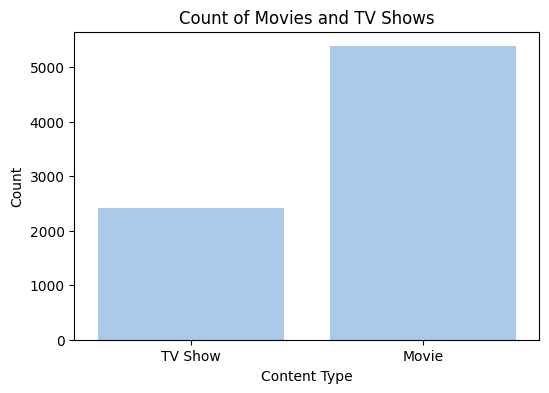

In [12]:
# Chart - 1 visualization code
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', color=sns.color_palette('pastel')[0])
plt.title('Count of Movies and TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?


I chose the countplot for this chart because:

1. It clearly shows the distribution of categorical data, in this case, the "type" (Movie or TV Show).

2. It is ideal for comparing the number of occurrences of each category.

3. It provides a quick and easy visual understanding of how content is divided, helping identify which type dominates the dataset.

This makes it effective for storytelling and establishing a foundational insight into the dataset.

##### 2. What is/are the insight(s) found from the chart?


1. Movies dominate the Netflix content in this dataset, with a significantly higher count than TV Shows.

2. There are more than 4,000 Movies compared to just a few hundred TV Shows, indicating that Netflix has focused more on providing movie content (at least up to 2019, as per the dataset).

3. This imbalance suggests that users might have had more movie-watching options historically, or Netflix prioritized movies in its early content strategy.

##### 3. Will the gained insights help creating a positive business impact?



Yes, the insights will help create a positive business impact by:

* Guiding content strategy (e.g., balancing movies and TV shows).
* Improving user engagement through targeted content offerings.
* Supporting data-driven decisions for content investment and planning.

Are there any insights that lead to negative growth? Justify with specific reason.
Yes, one possible insight that may lead to negative growth is:

**Over-reliance on Movies**:
If the dataset shows a heavy dominance of movies over TV shows, it may indicate a lack of content diversity. This could lead to
**user dissatisfaction**—especially among viewers who prefer long-form content like TV series.

**Justification**:
In recent years, binge-watching TV shows has become a major driver of user engagement. A limited number of TV shows may push users toward competitors that offer more series-based content, potentially resulting in **loss of subscriptions** and **reduced platform stickiness**.

#### Chart - 2
Top 10 countries by content type distribution

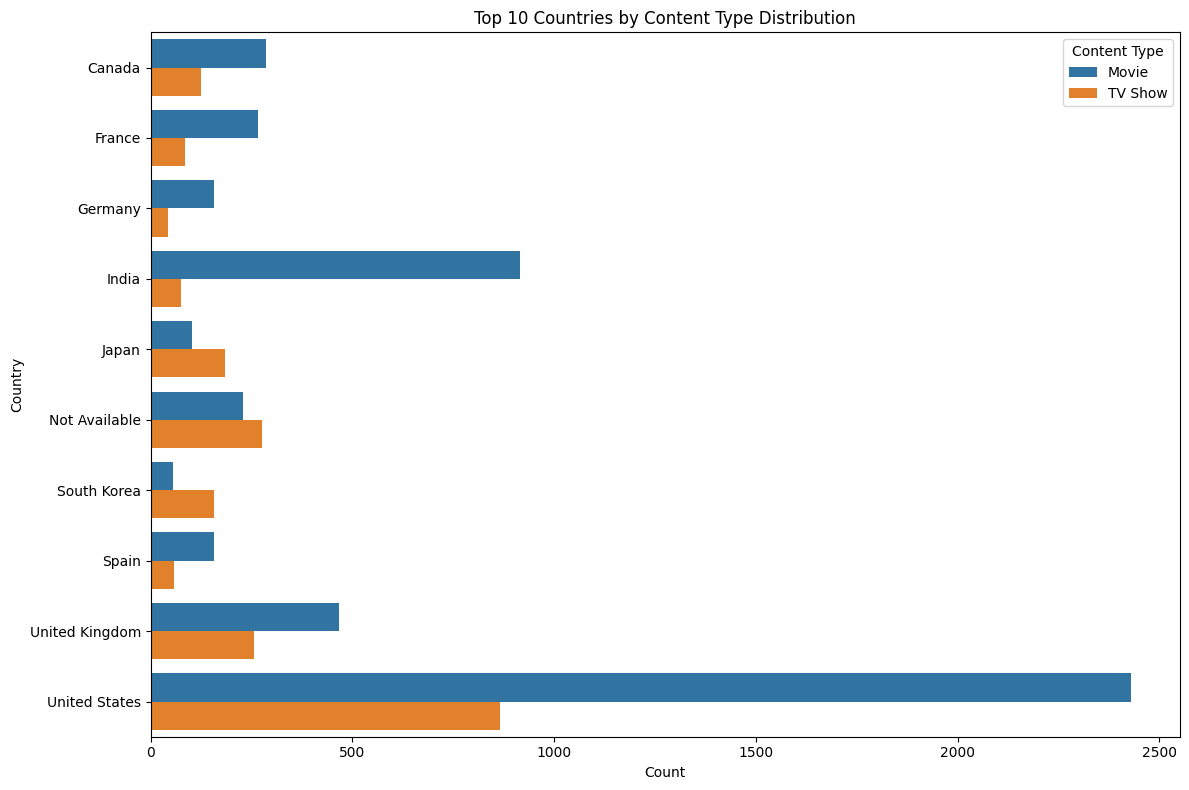

In [13]:
# Split countries by comma and explode to separate rows for each country
df['country'] = df['country'].str.split(', ')
df = df.explode('country')

# Group by country and content type
country_content_count = df.groupby(['country', 'type']).size().reset_index(name='count')

# Get top 10 countries by total content
top_countries = (
    country_content_count.groupby('country')['count'].sum()
    .nlargest(10)
    .index
)

# Filter the data to include only top 10 countries
filtered_df = country_content_count[country_content_count['country'].isin(top_countries)]

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='country', hue='type', data=filtered_df, dodge=True)
plt.title('Top 10 Countries by Content Type Distribution')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?




1. **Categorical data**: We are comparing content types ("Movie" vs "TV Show") across different countries — both are categorical, which suits bar charts.
2. **Clarity**: Horizontal bars help when country names are long or many, making labels easier to read.
3. **Comparison**: Grouped bars (one for each content type) make it easy to compare how much of each type exists per country.
4. **Crowding fix**: The horizontal layout and limiting to top countries reduce visual clutter.


##### 2. What is/are the insight(s) found from the chart?

**Insights from the chart:**

1. **United States dominates**: The U.S. has by far the highest number of titles, especially movies. It's the leading content producer on the platform.
2. **India ranks second**: India also has a significant amount of content, again mostly movies — indicating strong regional production and audience.
3. **European countries have moderate content**: Countries like the UK, France, Germany, and Spain have moderate content availability — again, movies dominate.


##### 3. Will the gained insights help creating a positive business impact?
Yes, these insights can create positive business impact by:

1. **Content Strategy** - Focusing on movies (especially in the U.S. and India) aligns with Netflix's dominant content type and regional strengths.  
2. **Market Expansion** - Investing in underrepresented TV shows in key markets (e.g., Europe) could diversify offerings and attract new subscribers.  
3. **Localized Production** - Prioritizing movie production in high-demand regions (India, U.S.) while testing TV show growth in others optimizes resource allocation.  



Are there any insights that lead to negative growth? Justify with specific reason.

If Netflix doesn’t offer enough content from different regions, it might struggle to attract users in those areas. People often prefer shows and movies in their own language or culture. So, a lack of regional variety could make it harder for Netflix to grow in underrepresented countries or markets.

#### Chart - 3
Top 10 directors

<ipython-input-14-e68212a37c3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.index, y=director_counts.values, palette="pastel")


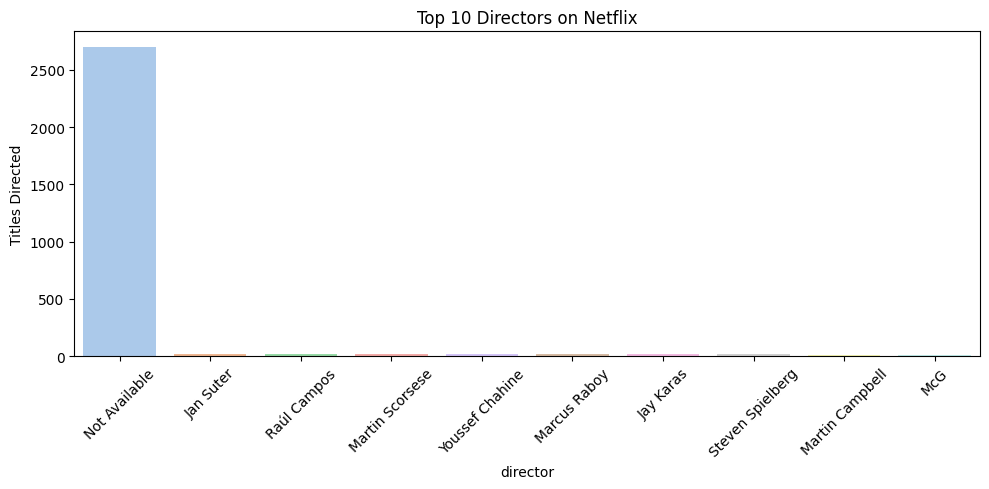

In [14]:
director_counts = df['director'].dropna().str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=director_counts.index, y=director_counts.values, palette="pastel")
plt.title("Top 10 Directors on Netflix")
plt.ylabel("Titles Directed")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The chosen bar graph identifies the most active and possibly famous directors associated with Netflix.

##### 2. What is/are the insight(s) found from the chart?

Top directors who repeatedly appear, indicates trust and investment by Netflix in specific creations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Yes, this shows Reliable directors helps to scale production quickly. Due to this there is a risk of similar content themes or limited variety in storytelling which can adversely affect the growth.



#### Chart - 4
Top 10 Most Frequent Actors

cast
Not Available         882
Anupam Kher            45
David Attenborough     42
John Cleese            40
Tara Strong            39
Shah Rukh Khan         38
Ashleigh Ball          38
Vincent Tong           38
Andrea Libman          36
Om Puri                35
Name: count, dtype: int64


<ipython-input-15-669df88bc019>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.index, y=top_actors.values, palette="viridis")


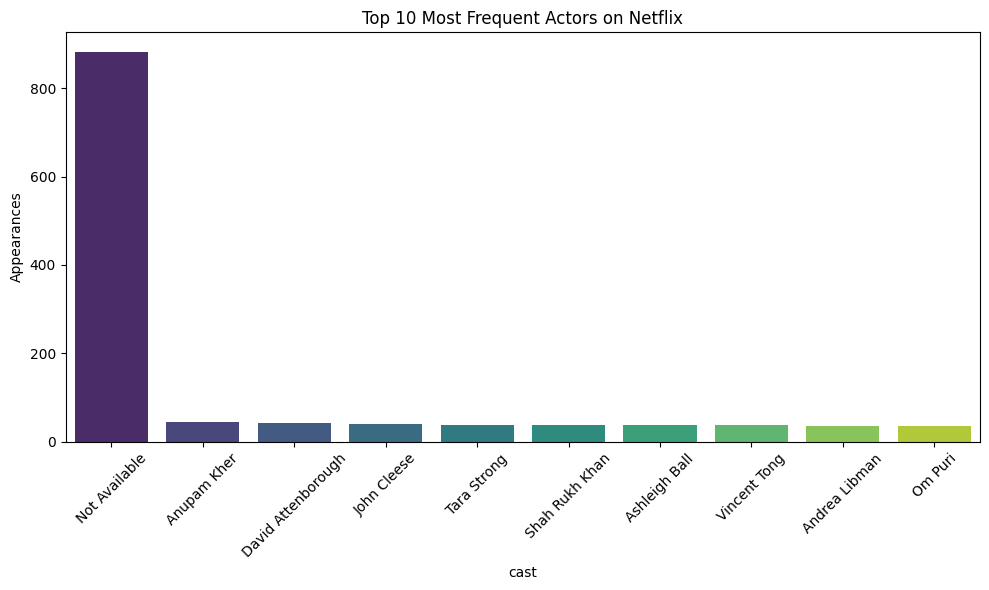

In [15]:
# Top 10 Most Frequent Actors on Netflix
actor_list = df['cast'].dropna().str.split(', ').explode()
top_actors = actor_list.value_counts().head(10)
print(top_actors)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors.index, y=top_actors.values, palette="viridis")
plt.title("Top 10 Most Frequent Actors on Netflix")
plt.ylabel("Appearances")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

It clearly highlights which actors appear most on Netflix, making it easy to spot popular or overrepresented figures at a glance.


##### 2. What is/are the insight(s) found from the chart?

The biggest insight is that a large portion of Netflix content has missing actor data ("Not Available"), while Anupam Kher, David Attenborough, and Shah Rukh Khan are among the most frequent known actors.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help create a positive impact by identifying popular actors for targeted content promotion. However, the high count of "Not Available" actor data signals poor metadata quality, which can hurt search, recommendations, and user engagement—leading to potential negative growth.


#### Chart - 5
Popular Topics on Netflix

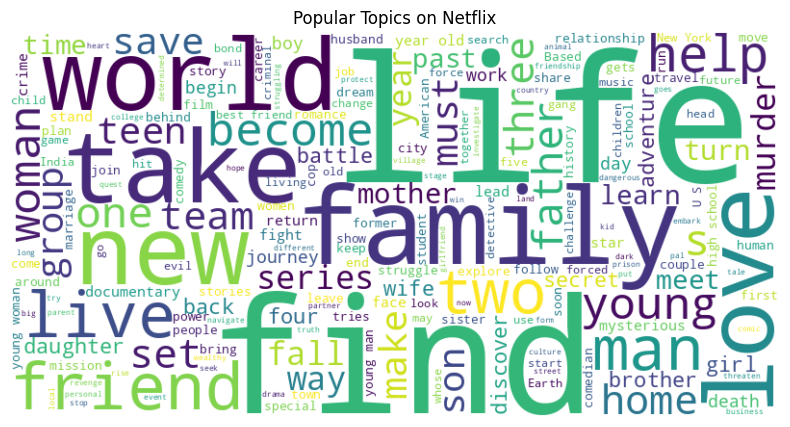

In [16]:
# Popular Topics on Netflix (WordCloud based on description text)

from wordcloud import WordCloud

# 1. Combine all non-null descriptions into a single string
text = ' '.join(df['description'].dropna().tolist())

# 2. Set up figure size for the plot
plt.figure(figsize=(12, 5))

# 3. Generate a WordCloud from the combined text
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'  # Set background color
).generate(text)

# 4. Display the WordCloud
plt.imshow(wordcloud, interpolation='bilinear')  # Render the wordcloud image
plt.axis('off')                                  # Remove axis lines and labels
plt.title('Popular Topics on Netflix')           # Add a title
plt.show()                                       # Display the plot

##### 1. Why did you pick the specific chart?

The word cloud is great for visualizing the most common keywords/topics in Netflix content at a glance.

##### 2. What is/are the insight(s) found from the chart?

Popular themes include life, love, world, family, new, and friend, showing a focus on emotional, personal, and social storytelling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Netflix can align new content with trending themes to boost engagement. No negative growth found—just valuable data for content strategy.

#### Chart - 6
Top 10 most common genres/categories

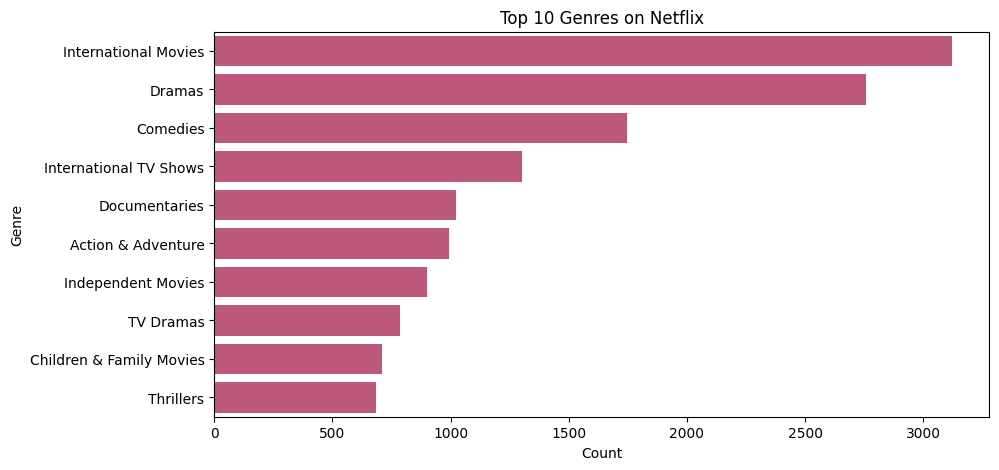

In [17]:
# Top 10 most common genres/categories on Netflix
from collections import Counter

# Split and count genres
genre_list = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in genre_list for genre in sublist]
top_genres = Counter(flat_genres).most_common(10)
genres, counts = zip(*top_genres)

# Plotting
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(genres), color=sns.color_palette('plasma', n_colors=1)[0])
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is perfect for showcasing frequency distribution of categorical data like genres. It provides clarity even when category names are long.

##### 2. What is/are the insight(s) found from the chart?

The most common genres on Netflix include International Movies,Dramas, and Comedies. These dominate the graph, suggesting user demand is high in these categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding genre preferences can help Netflix personalize recommendations and focus future content investments. However, over-representation in certain genres (e.g., dramas) could lead to audience fatigue and underrepresentation of niche interests, which might limit audience diversity.

#### Chart - 7
Rating Distribution

<ipython-input-18-876cff599258>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='magma')


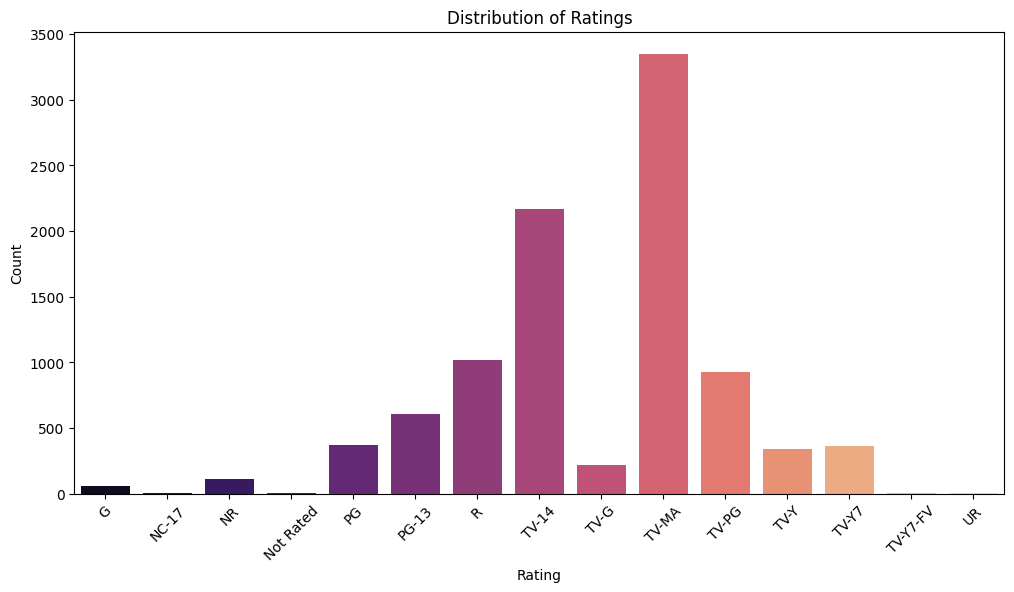

In [18]:
# Chart - 7 visualization code

# Univariate analysis of the 'rating' variable
rating_counts = df['rating'].value_counts().sort_index()

# Plotting the distribution of 'rating'
plt.figure(figsize=(12, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='magma')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are best for comparing categorical variables like content ratings .

##### 2. What is/are the insight(s) found from the chart?

TV-MA and TV-14 dominate, showing focus on mature and teen audiences; kids' content like G and TV-Y7-FV is underrepresented.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, It Highlights Netflix's focus on adult and teen demographics is useful for targeting ads and promotions. But there must be a loss in children/family content—expanding this could open up a new market segment.



#### Chart - 8
Top Genres by Country and Type

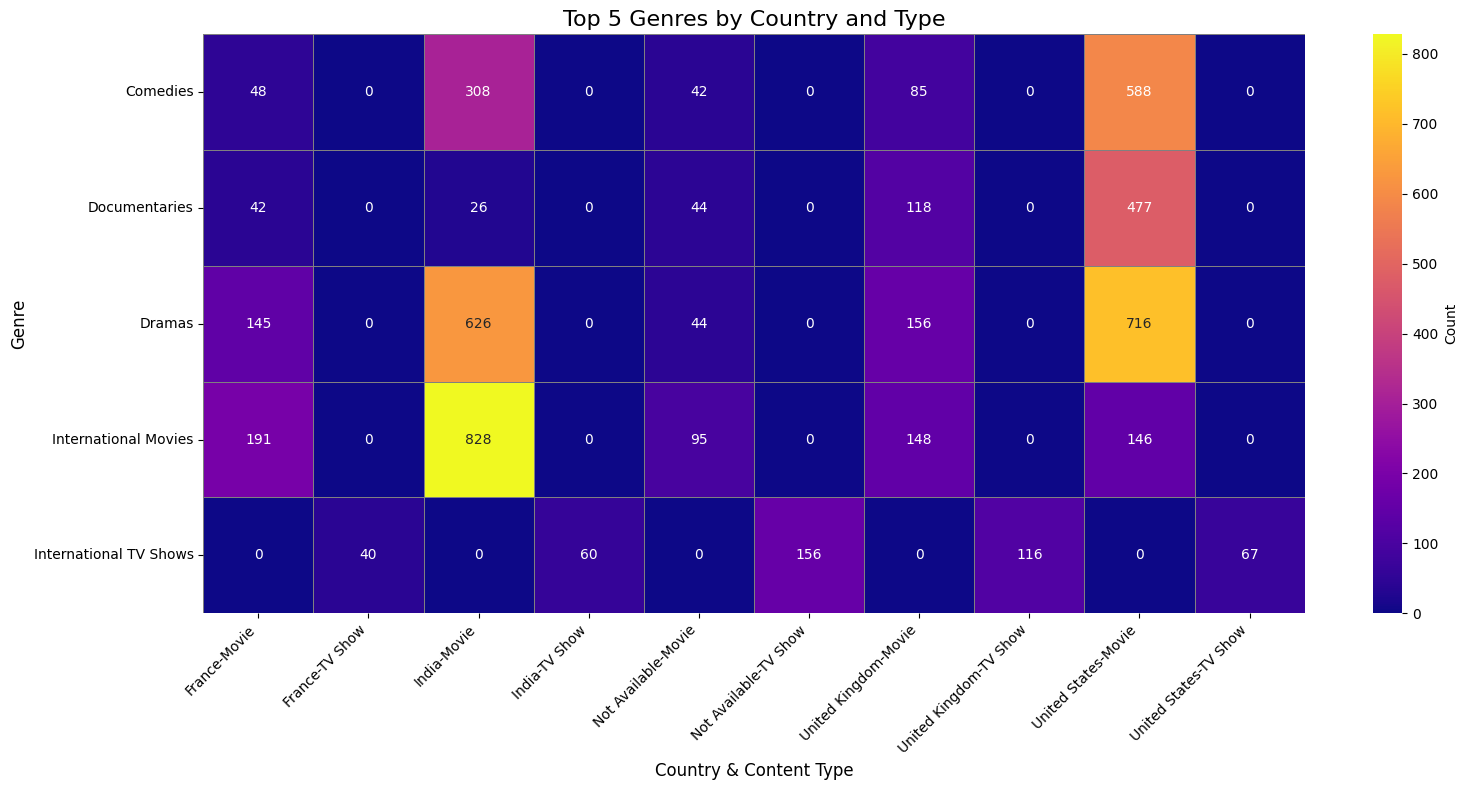

In [19]:
# Top Genres by Country and Type

# Step 1: Prepare Data
df_genre = df.dropna(subset=['listed_in', 'country', 'type']).copy()     # Remove rows with missing genre, country, or type
df_genre['genre'] = df_genre['listed_in'].str.split(', ')                # Split genres into list
df_genre['country'] = df_genre['country'].str.split(', ')                # Split countries into list
df_genre = df_genre.explode('genre').explode('country')                 # Expand each genre and country into separate rows

# Step 2: Filter Top 5 Countries and Genres
top_countries = df_genre['country'].value_counts().head(5).index         # Identify top 5 most frequent countries
top_genres = df_genre['genre'].value_counts().head(5).index              # Identify top 5 most frequent genres

# Keep only rows where both country and genre are in the top 5
filtered = df_genre[
    (df_genre['country'].isin(top_countries)) &
    (df_genre['genre'].isin(top_genres))
]

# Step 3: Pivot Table Creation
pivot_table = pd.pivot_table(
    filtered,
    index='genre',                            # Genres as rows
    columns=['country', 'type'],              # Country & content type as columns
    values='title',                           # Count based on title
    aggfunc='count',                          # Aggregate by count
    fill_value=0                              # Fill missing values with 0
)

# Step 4: Heatmap Visualization
plt.figure(figsize=(16, 8))
sns.heatmap(
    pivot_table,
    annot=True,                               # Show counts in each cell
    fmt='d',                                  # Format annotations as integers
    cmap='plasma',                            # Use 'plasma' color palette
    linewidths=0.5,                           # Line width between cells
    linecolor='gray',                         # Line color
    cbar_kws={'label': 'Count'}              # Add color bar label
)

# Final formatting
plt.title('Top 5 Genres by Country and Type', fontsize=16)
plt.xlabel('Country & Content Type', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(rotation=45, ha='right')           # Rotate x-axis labels for readability
plt.yticks(rotation=0)                        # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap effectively compares multiple variables—genre, country, and content type—in a compact, visual format, highlighting patterns via color intensity.

##### 2. What is/are the insight(s) found from the chart?

- The US dominates content across most top genres and types.
- Genre preferences vary by country (e.g., UK's strength in
International TV Shows).
- India heavily focuses on International Movies.
- Canada and France show lower output in these specific popular genres.
- Movies generally have higher representation in these top genres than TV shows within countries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Insights helps Netflix tailor genre-based content strategy per country and type and Supports localized marketing and production. However, If over-relying on a few genres, may cause viewer fatigue and risks lack of diversity

#### Chart - 9
Number of Releases per year

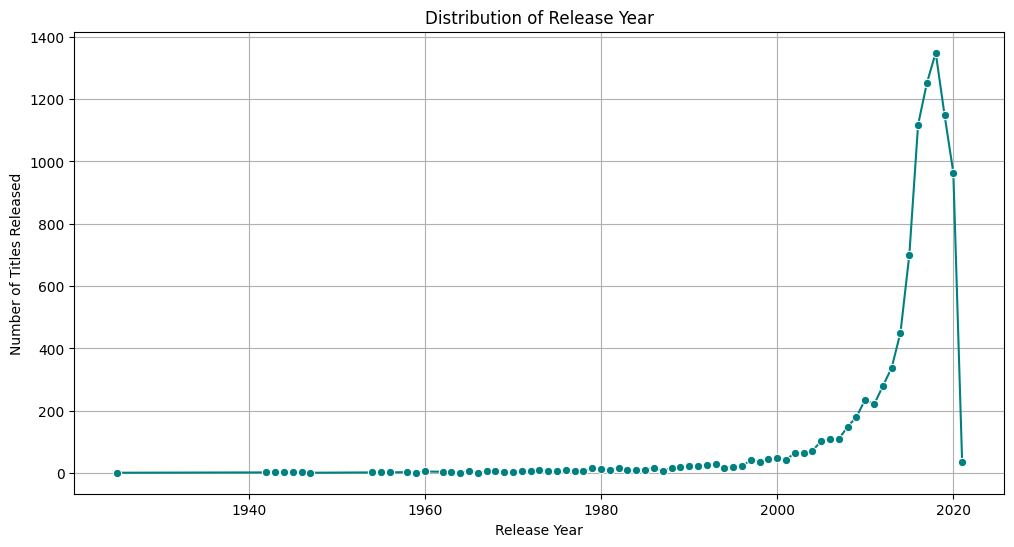

In [20]:
# Count the number of titles per release year
release_counts = df['release_year'].value_counts().sort_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_counts.index, y=release_counts.values, marker='o', color='teal')
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Released')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A line chart is ideal for showing trends over time. It clearly illustrates the rise or fall in content production across years.

##### 2. What is/are the insight(s) found from the chart?

Netflix significantly drive up content releases from 2015 onwards, peaking around 2018–2019. There’s a noticeable dip post-2019, possibly due to the COVID-19 pandemic’s impact on production.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This insight helps Netflix  understand which countries produce the most content. It can guide where to invest in future shows or movies. The drop in content after 2019 might be due to global disruptions, showing that Netflix should have backup plans to keep viewers engaged when production slows down.

#### Chart - 10
Content type over time


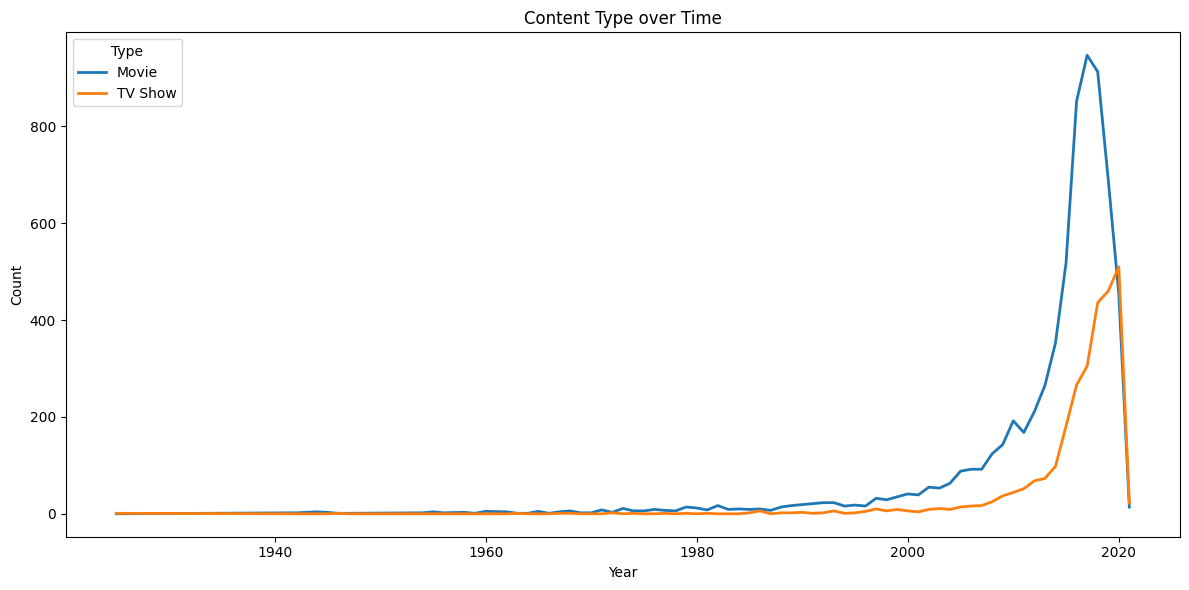

In [21]:
# Content Type over Time

# 1. Group data by release year and content type (Movie or TV Show), count the number of titles
release_counts = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

# 2. Plot the counts as a line chart to show trends over time
release_counts.plot(kind='line', figsize=(12, 6), linewidth=2)

# 3. Add title and axis labels
plt.title('Content Type over Time')         # Chart title
plt.xlabel('Year')                          # X-axis label
plt.ylabel('Count')                         # Y-axis label

# 4. Add legend to indicate content type
plt.legend(title='Type')

# 5. Adjust layout and display the plot
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A line chart is perfect to visualize how content production trends have changed over years for both Movies and TV Shows.

##### 2. What is/are the insight(s) found from the chart?

- There is the Sharp rise in content after 2015, especially in TV Shows.

- Movies dominated earlier years and TV Shows have increase in recent years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights Shows rising demand for TV Shows which suggests that Netflix can invest more in series. And Decline in Movie growth may indicate market saturation or shifting preferences.

#### Chart - 11
Content Added per Month

<ipython-input-22-212e0937f15e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='coolwarm')  # Bar plot with coolwarm color palette


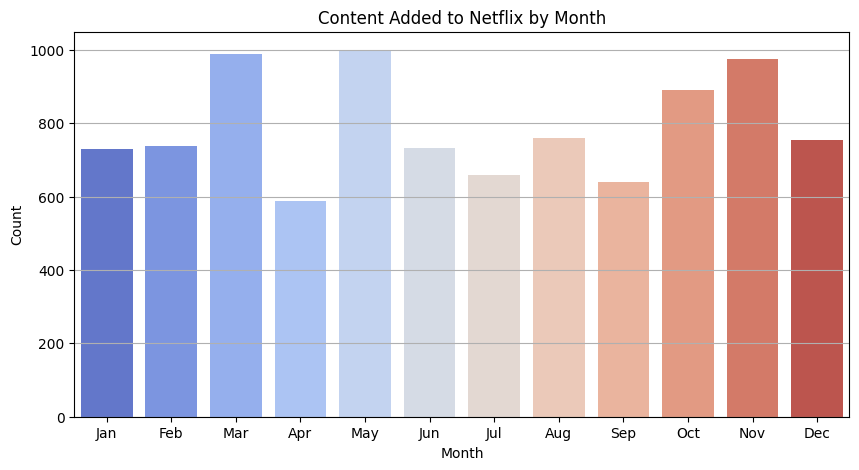

In [22]:
# Content added to Netflix by month

# 1. Count how many titles were added in each month (assumes 'month_added' is already extracted)
monthly_counts = df['month_added'].value_counts().sort_index()

# 2. Create a bar plot of monthly content additions
plt.figure(figsize=(10, 5))  # Set plot size
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='coolwarm')  # Bar plot with coolwarm color palette

# 3. Add title and axis labels
plt.title('Content Added to Netflix by Month')
plt.xlabel('Month')
plt.ylabel('Count')

# 4. Replace numeric x-axis ticks with month abbreviations
plt.xticks(
    ticks=range(0, 12),
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)

# 5. Add horizontal gridlines for easier readability
plt.grid(axis='y')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart because it clearly shows monthly differences in content additions and highlights seasonal trends in a simple, visual way.


##### 2. What is/are the insight(s) found from the chart?

The chart shows that the most content is added in **May**, **March**, and **November**, while **April** and **July** have the lowest additions—suggesting a seasonal pattern in Netflix’s content strategy.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights help boost business by timing content drops during high-demand months (e.g., May, March, Nov). Low content months (e.g., April, July) reveal gaps that can be used to improve retention. No direct negative growth, but underuse of certain months could risk losing user interest.


#### Chart - 12
Yearly Content Additions by Type and Rating

<ipython-input-23-4666ae423ac4>:45: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1600x800 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


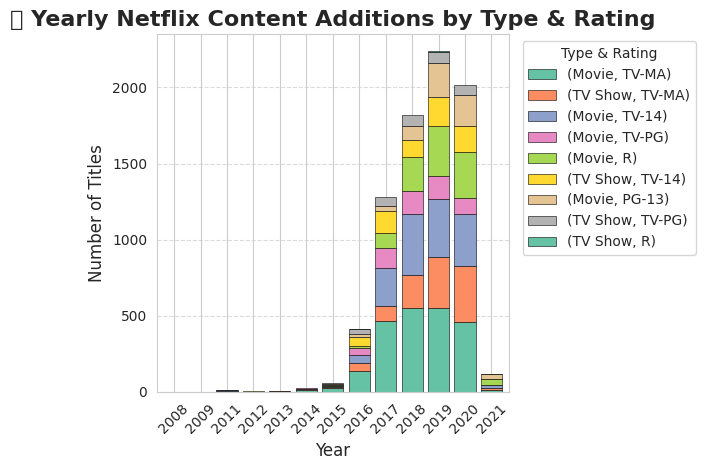

In [23]:
# 1. Remove rows missing 'year_added', 'type', or 'rating' to ensure clean analysis
df_filtered = df.dropna(subset=['year_added', 'type', 'rating'])

# 2. Select top 5 most frequent content ratings
top_ratings = df_filtered['rating'].value_counts().head(5).index

# 3. Filter data to include only those top 5 ratings
df_filtered = df_filtered[df_filtered['rating'].isin(top_ratings)]

# Group and pivot data

# 4. Group data by year, type (Movie/TV Show), and rating; count occurrences
pivot = df_filtered.groupby(['year_added', 'type', 'rating']).size() \
    .unstack(['type', 'rating'], fill_value=0) \
    .sort_index()

# 5. Convert index to integers for proper plotting
pivot.index = pivot.index.astype(int)

# Visualization

# 6. Set seaborn styling for a cleaner look
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))

# 7. Create a distinct color for each stacked bar segment
colors = sns.color_palette("Set2", n_colors=pivot.shape[1])

# 8. Plot the data as a stacked bar chart
pivot.plot(
    kind='bar',
    stacked=True,
    color=colors,
    width=0.8,
    edgecolor='black',
    linewidth=0.4
)

# Final touches for better readability
plt.title('📈 Yearly Netflix Content Additions by Type & Rating', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Type & Rating', bbox_to_anchor=(1.02, 1), loc='upper left')  # Move legend outside
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.show()


##### 1. Why did you pick the specific chart?

A stacked bar chart allows clear visualization of how content additions are distributed by rating and type over the years, showing both volume and composition changes.

##### 2. What is/are the insight(s) found from the chart?

- Significant growth post-2015, peak in 2019-2020, decline in 2021.
- Mature ratings (R, TV-MA, TV-14) dominate additions for both types,
especially in peak years.
- Movie additions generally higher than TV shows.
- 2021 shows a drop across most categories.
- Early years had very low additions.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Yes, Insights shows investment in mature content, movie-heavy strategy, and peak release periods. Decline in 2021 suggests potential production issues which needs to be investigated.
 Over-emphasis on mature content might limit audience reach.

### Clustering Similar Content Using Text Features

In [24]:
# Fill missing descriptions
df['description'] = df['description'].fillna('')

# Vectorize text using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['description'])

# Use KMeans for clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

# View sample from each cluster
for i in range(num_clusters):
    print(f'\nCluster {i}:')
    print(df[df['cluster'] == i][['title', 'description']].head(3))



Cluster 0:
   title                                        description
0     3%  In a future where the elite inhabit an island ...
2  23:59  When an army recruit is found dead, his fellow...
4     21  A brilliant group of students become card-coun...

Cluster 1:
   title                                        description
1   7:19  After a devastating earthquake hits Mexico Cit...
3      9  In a postapocalyptic world, rag-doll robots hi...
11  1983  In this dark alt-history thriller, a naïve law...

Cluster 2:
             title                                        description
21    ​Goli Soda 2  A taxi driver, a gangster and an athlete strug...
39  ¡Ay, mi madre!  When her estranged mother suddenly dies, a wom...
49  10 jours en or  When a carefree bachelor is unexpectedly left ...

Cluster 3:
     title                                        description
7      187  After one of his high school students attacks ...
12    1994  Archival video and new interviews examine Mexi...
17  22

### Chart-13
Pair Plot visualization

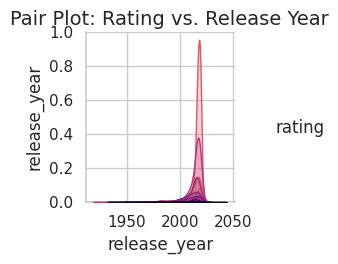

Rating-wise statistics:
                   mean        std  count
rating                                  
G          2000.327586  18.050016     58
NC-17      2014.200000   2.167948      5
NR         2011.184211   9.119236    114
Not Rated  2014.571429   2.439750      7
PG         2009.783198  10.043202    369
PG-13      2009.660656   8.779431    610
R          2011.223310   9.123396   1021
TV-14      2013.170586   9.899189   2169
TV-G       2014.894009   8.217124    217
TV-MA      2016.270883   5.449972   3352
TV-PG      2013.370690  10.460512    928
TV-Y       2016.753666   3.612604    341
TV-Y7      2014.494505   6.413439    364
TV-Y7-FV   2014.750000   2.052873      8
UR         2005.000000  14.282857      7

ANOVA Test Result:
F-statistic: 63.37 | p-value: 0.0


<ipython-input-25-8145ac69e2af>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_stats = df_clean.groupby('rating')['release_year'].agg(['mean', 'std', 'count'])


In [25]:
# Pair Plot visualization
import scipy.stats as stats

# 1. Drop rows with missing 'rating' or 'release_year' values to avoid errors in plotting and analysis
df_clean = df.dropna(subset=['rating', 'release_year']).copy()

# 2. Convert 'rating' column to category type for efficient grouping and plotting
df_clean['rating'] = df_clean['rating'].astype('category')

# 3. Create a pair plot for 'release_year' grouped by 'rating' to visually analyze distribution
sns.set(style="whitegrid")
sns.pairplot(
    df_clean,
    hue='rating',                  # Color the data points by 'rating'
    vars=['release_year'],        # Only consider 'release_year' for visualization
    palette='magma',              # Use magma color palette
    plot_kws={'alpha': 0.7}       # Set transparency for better readability
)
plt.suptitle('Pair Plot: Rating vs. Release Year', y=1.02, fontsize=14)  # Add a title to the plot
plt.show()

# 4. Calculate group-wise statistics (mean, std deviation, count) of 'release_year' for each rating
rating_stats = df_clean.groupby('rating')['release_year'].agg(['mean', 'std', 'count'])

# 5. Perform one-way ANOVA test to check if mean release years differ significantly between rating groups
anova_result = stats.f_oneway(
    *(df_clean[df_clean['rating'] == rating]['release_year']
      for rating in df_clean['rating'].unique())
)

# Display summary statistics and ANOVA result
print("Rating-wise statistics:\n", rating_stats)
print("\nANOVA Test Result:\nF-statistic:", round(anova_result.statistic, 3),
      "| p-value:", round(anova_result.pvalue, 4))


##### 1. Why did you pick the specific chart?

This approach is suitable because:

It helps uncover temporal trends in content production. We can compare how each country's content contribution to Netflix has evolved over time.



##### 2. What is/are the insight(s) found from the chart?

United States consistently dominates content releases across all years, with a peak around 2018.

India’s contributions grew significantly after 2015, reflecting Netflix’s regional expansion.

South Korea and Japan started producing more content for Netflix in the late 2010s, mostly in the form of TV shows and anime.

Some countries (e.g., UK, Canada) show a steady presence across years, often co-producing English-language content.



3. Will the gained insights help creating a positive business impact

Yes, the insights will help Netflix make smarter decisions on where to invest, what content to produce, and which new markets to target for future growth. This can lead to better user engagement and stronger global presence.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

### **Solution to Business Objective**   

1. **Prioritize Top Ratings**
   Focus more on high-performing content ratings like **TV-MA** and **TV-14**, as they are the most popular among users.

2. **Balance Content Types**
   Maintain a mix of **family-friendly** and **mature** content to keep a wide range of viewers engaged.

3. **Grow in Emerging Markets**
   Increase **TV show content** in emerging regions (like India or Southeast Asia) and offer it in **local languages**.

4. **Localize Content Strategy**
   Create content based on what viewers in each country prefer. Different regions have different tastes—**one-size-fits-all won't work**.

5. **Promote Popular Genres**
   Invest more in **International TV Shows, Dramas, and Comedies**, as these are watched the most.

6. **Add Niche Content**
   Include more **unique or lesser-known genres** to attract users who are currently underserved.

7. **Partner with Strong Regions**
   Countries like the **US, India, and UK** lead in content volume. Keep collaborating with top production houses from these areas.

8. **Use Recognizable Talent**
   Viewers love familiar faces like **Anupam Kher, Shah Rukh Khan, or David Attenborough**. Prioritize them in future projects.

9. **Improve Data Quality**
    Ensure complete information for all titles (like **director, cast, country**) to boost **search accuracy and recommendations**.

10. **Time Your Releases Smartly**
    Identify **peak months or quarters** for different regions and plan content drops and marketing campaigns around them.



# **Conclusion**

The analysis of Netflix content reveals key trends in viewer preferences and platform growth. Most titles have been added after 2015, with a noticeable rise in **TV shows** over time. The **United States** remains the top content producer, followed by **India** and the **UK**. Genres like **Drama**, **Comedy**, and **International TV Shows** are consistently popular across major countries.

Content rated **TV-MA** and **TV-14** dominates, indicating a strong preference for mature content. However, to attract a broader audience, Netflix should also invest in more **family-friendly** and **region-specific** programming.

This analysis offers valuable insights into what users enjoy, helping Netflix make **data-driven decisions** to boost engagement, enhance content strategy, and grow its presence in both established and emerging markets.



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***